By Nitish Adhikari

Email id :nitishbuzzpro@gmail.com, +91-9650740295
    
Linkedin : https://www.linkedin.com/in/nitish-adhikari-6b2350248 

In [1]:
# import libraries
import pickle
import numpy as np

In [2]:
#Load the training data
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
#Load the test data
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

## Exploring the Format of the Data

In [4]:
#check the data type
type(train_data)

list

In [5]:
#check the data type
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
#check the train_data
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [9]:
#Check the story
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [10]:
#join the story
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
#join the question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
#Answer 
train_data[0][2]

'no'

## Setting up Vocabulary of All Words

In [13]:
#create set of unique 
vocab = set()

all_data = test_data + train_data

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [14]:
#Add 'yes' and 'no' to vocab
vocab.add('yes')
vocab.add('no')

In [15]:
#print vocab
print(vocab)

{'back', 'journeyed', 'dropped', '.', 'Mary', 'garden', '?', 'hallway', 'down', 'apple', 'Is', 'moved', 'the', 'to', 'went', 'put', 'left', 'up', 'Daniel', 'grabbed', 'football', 'no', 'office', 'milk', 'travelled', 'yes', 'took', 'there', 'Sandra', 'got', 'bathroom', 'in', 'picked', 'kitchen', 'discarded', 'John', 'bedroom'}


In [16]:
vocab_len = len(vocab)+1
vocab_len

38

In [17]:
#check for the long story
all_story_lens = [len(data[0]) for data in all_data]
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [18]:
#Maximum story length
max_story_len = max(all_story_lens)
max_story_len

156

In [19]:
#Maximum qestion length
max_question_len = max(len(data[1]) for data in all_data)
max_question_len

6

In [20]:
import tensorflow 
from tensorflow .keras.preprocessing.sequence import pad_sequences
from tensorflow .keras.preprocessing.text import Tokenizer

C:\Users\DELL PC\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [21]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [22]:
tokenizer.word_index

{'back': 1,
 'journeyed': 2,
 'dropped': 3,
 '.': 4,
 'mary': 5,
 'garden': 6,
 '?': 7,
 'hallway': 8,
 'down': 9,
 'apple': 10,
 'is': 11,
 'moved': 12,
 'the': 13,
 'to': 14,
 'went': 15,
 'put': 16,
 'left': 17,
 'up': 18,
 'daniel': 19,
 'grabbed': 20,
 'football': 21,
 'no': 22,
 'office': 23,
 'milk': 24,
 'travelled': 25,
 'yes': 26,
 'took': 27,
 'there': 28,
 'sandra': 29,
 'got': 30,
 'bathroom': 31,
 'in': 32,
 'picked': 33,
 'kitchen': 34,
 'discarded': 35,
 'john': 36,
 'bedroom': 37}

In [23]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [24]:
#convert to sequence
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)
train_story_sequence

[[5, 12, 14, 13, 31, 4, 29, 2, 14, 13, 37, 4],
 [5,
  12,
  14,
  13,
  31,
  4,
  29,
  2,
  14,
  13,
  37,
  4,
  5,
  15,
  1,
  14,
  13,
  37,
  4,
  19,
  15,
  1,
  14,
  13,
  8,
  4],
 [5,
  12,
  14,
  13,
  31,
  4,
  29,
  2,
  14,
  13,
  37,
  4,
  5,
  15,
  1,
  14,
  13,
  37,
  4,
  19,
  15,
  1,
  14,
  13,
  8,
  4,
  29,
  15,
  14,
  13,
  34,
  4,
  19,
  15,
  1,
  14,
  13,
  31,
  4],
 [5,
  12,
  14,
  13,
  31,
  4,
  29,
  2,
  14,
  13,
  37,
  4,
  5,
  15,
  1,
  14,
  13,
  37,
  4,
  19,
  15,
  1,
  14,
  13,
  8,
  4,
  29,
  15,
  14,
  13,
  34,
  4,
  19,
  15,
  1,
  14,
  13,
  31,
  4,
  19,
  33,
  18,
  13,
  21,
  28,
  4,
  19,
  15,
  14,
  13,
  37,
  4],
 [5,
  12,
  14,
  13,
  31,
  4,
  29,
  2,
  14,
  13,
  37,
  4,
  5,
  15,
  1,
  14,
  13,
  37,
  4,
  19,
  15,
  1,
  14,
  13,
  8,
  4,
  29,
  15,
  14,
  13,
  34,
  4,
  19,
  15,
  1,
  14,
  13,
  31,
  4,
  19,
  33,
  18,
  13,
  21,
  28,
  4,
  19,
  15,
  14,
  13,


In [25]:
len(train_story_sequence)

10000

In [26]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    
    import tensorflow 
    from tensorflow .keras.preprocessing.sequence import pad_sequences
    from tensorflow .keras.preprocessing.text import Tokenizer
    
    X = [] #STORIES 
    Xq = [] #SORIES question
    Y = [] #Correct answer(yes/no)
    
    for story,query,answer in data:
        #for each story
        x = [word_index[word.lower()] for word in story]
        #for each question
        xq = [word_index[word.lower()] for word in query]
        #for answer
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        #Append 
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len), np.array(Y))

In [27]:
#Applying on train data
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [28]:
#Applying on test data
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [29]:
inputs_test

array([[ 0,  0,  0, ..., 13, 37,  4],
       [ 0,  0,  0, ..., 13,  6,  4],
       [ 0,  0,  0, ..., 13,  6,  4],
       ...,
       [ 0,  0,  0, ..., 13, 10,  4],
       [ 0,  0,  0, ..., 13,  6,  4],
       [ 0,  0,  0, ..., 10, 28,  4]])

In [30]:
inputs_test.shape

(1000, 156)

In [31]:
queries_test

array([[11, 36, 32, 13, 34,  7],
       [11, 36, 32, 13, 34,  7],
       [11, 36, 32, 13,  6,  7],
       ...,
       [11,  5, 32, 13, 37,  7],
       [11, 29, 32, 13,  6,  7],
       [11,  5, 32, 13,  6,  7]])

In [32]:
queries_test.shape

(1000, 6)

In [33]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
answers_test.shape

(1000, 38)

In [35]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [36]:
#Import neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Activation, Dense, Permute, Dropout, add, dot, concatenate,LSTM

In [37]:
#PLACEHOLDER shape =(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [38]:
len(vocab)

37

In [39]:
#vocab_len
vocab_size = len(vocab) + 1

In [40]:
# Input Encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [41]:
input_encoder_m

In [42]:
# Input Encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [43]:
input_encoder_c

In [44]:
# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [45]:
question_encoder

In [46]:
#Encoded 
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [47]:
input_encoded_m

<KerasTensor: shape=(None, 156, 64) dtype=float32 (created by layer 'sequential')>

In [48]:
input_encoded_c

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'sequential_1')>

In [49]:
question_encoded

<KerasTensor: shape=(None, 6, 64) dtype=float32 (created by layer 'sequential_2')>

In [50]:
#Dot product to compute match between first vector sequence and query
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)
match

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'activation')>

In [51]:
#Add the tensors 
response = add([match, input_encoded_c])
response = Permute((2,1))(response)
response

<KerasTensor: shape=(None, 6, 156) dtype=float32 (created by layer 'permute')>

In [52]:
#concatenate responce and question_encoded
answer = concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [53]:
# reduce the answer tensor by LSTM layer
answer = LSTM(32)(answer)
answer

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm')>

In [54]:
# Add dropout layer for regularization
answer = Dropout(0.5)(answer)
answer

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dropout_3')>

In [55]:
#Add dense layer
answer = Dense(vocab_size)(answer)
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'dense')>

In [56]:
answer = Activation('softmax')(answer)
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'activation_1')>

In [57]:
#Create Model
model = Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
#Summary of the Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [59]:
#Train the model
history = model.fit([inputs_train,queries_train],answers_train, batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/100
313/313 [==============================] - 11s 21ms/step - loss: 0.9252 - accuracy: 0.4936 - val_loss: 0.6956 - val_accuracy: 0.4970
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.7097 - accuracy: 0.4846 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 5s 18ms/step - loss: 0.6979 - accuracy: 0.5059 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6967 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6963 - accuracy: 0.5011 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6957 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6955 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy

313/313 [==============================] - 5s 17ms/step - loss: 0.6723 - accuracy: 0.5502 - val_loss: 0.6836 - val_accuracy: 0.5470
Epoch 58/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6627 - accuracy: 0.5743 - val_loss: 0.6700 - val_accuracy: 0.5840
Epoch 59/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6513 - accuracy: 0.6062 - val_loss: 0.6575 - val_accuracy: 0.6300
Epoch 60/100
313/313 [==============================] - 5s 18ms/step - loss: 0.6345 - accuracy: 0.6305 - val_loss: 0.6440 - val_accuracy: 0.6420
Epoch 61/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6298 - accuracy: 0.6482 - val_loss: 0.6289 - val_accuracy: 0.6580
Epoch 62/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6192 - accuracy: 0.6623 - val_loss: 0.6305 - val_accuracy: 0.6660
Epoch 63/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6114 - accuracy: 0.6770 - val_loss: 0.6088 - val_accuracy: 0.681

# Evaluating the Model

### Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


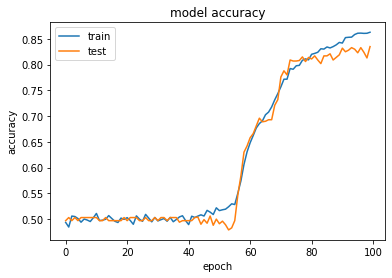

In [60]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
#Save the model
model.save('chatbot_10.h5')

In [62]:
model.load_weights('chatbot_10.h5')

In [63]:
pred_results = model.predict(([inputs_test,queries_test]))
pred_results

32/32 [==============================] - 1s 5ms/step


array([[3.09907087e-08, 2.95258289e-08, 3.23730873e-08, ...,
        3.47191360e-08, 3.80365677e-08, 2.98733589e-08],
       [3.89142372e-08, 3.82839751e-08, 3.89094872e-08, ...,
        4.58020928e-08, 3.96928037e-08, 3.58063552e-08],
       [3.45161340e-08, 2.55341330e-08, 2.84235142e-08, ...,
        3.00708436e-08, 2.76699215e-08, 2.86630044e-08],
       ...,
       [8.15673502e-08, 9.23318879e-08, 9.81558230e-08, ...,
        1.02313834e-07, 8.36872545e-08, 7.83934979e-08],
       [5.87462168e-09, 4.54170346e-09, 4.94692731e-09, ...,
        4.97841945e-09, 4.64706673e-09, 4.76636020e-09],
       [4.42603714e-08, 3.49791307e-08, 3.71936366e-08, ...,
        4.09944683e-08, 4.10593408e-08, 4.43241532e-08]], dtype=float32)

## Test the model on a brand new stroy and query

In [64]:
my_story = "John left the kitchen . Sandra dropped the football in the garden"
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden']

In [65]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [66]:
#Create dataset in the same format as training data
mydata = [(my_story.split(),my_question.split(), 'yes')]
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [67]:
#Vectorize mydata
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [68]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        36, 17, 13, 34,  4, 29,  3, 13, 21, 32, 13,  6]])

In [69]:
my_ques

array([[13, 21, 32, 13,  6,  7]])

In [70]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [71]:
#make prediction
pred_results = model.predict(([my_story,my_ques]))
pred_results

1/1 [==============================] - 0s 158ms/step


array([[4.6990927e-08, 3.3940616e-08, 3.5717463e-08, 3.3223571e-08,
        3.9938381e-08, 3.9252654e-08, 3.4986495e-08, 3.8550159e-08,
        3.6416644e-08, 3.9187270e-08, 4.1949612e-08, 3.8973642e-08,
        3.8412320e-08, 3.5924341e-08, 3.8187398e-08, 3.8528622e-08,
        3.7964369e-08, 3.9069057e-08, 3.2941262e-08, 3.8059781e-08,
        3.0868996e-08, 3.8555601e-08, 1.3599356e-01, 4.4126548e-08,
        3.1642106e-08, 3.6187458e-08, 8.6400509e-01, 3.1659976e-08,
        3.2056889e-08, 3.7009883e-08, 3.7989576e-08, 4.2547118e-08,
        3.9220470e-08, 3.8572594e-08, 4.4431768e-08, 3.9599545e-08,
        3.3852686e-08, 4.2501863e-08]], dtype=float32)

In [72]:
val_max = np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
    if val == val_max:
        print(key)

yes


# DONE!!